In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")
transaction = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
display(purchase.head())
print('\n\n_________________________\n\n')
display(transaction.head())

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream




_________________________




,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
import re
from collections import Counter

prod_name = str(list(transaction.PROD_NAME))
words = re.sub("\d+", "", prod_name)
words = re.sub(" g", "", words)
words = re.sub(r"[^\w\s]", "", words)

mots = words.split()
compteur_mots = {}
for mot in mots:
    if mot in compteur_mots:
        compteur_mots[mot] += 1
    else:
        compteur_mots[mot] = 1
        
dico = {}
for mot, frequence in sorted(compteur_mots.items(), key=lambda x: x[1], reverse=True):
    dico[mot] = frequence

pd.DataFrame(dico, index=[0]).T

,0
Chips,49770
Kettle,41288
Smiths,28860
Salt,27976
Cheese,27890
...,...
FrchOnin,1432
Pc,1431
NCC,1419
Garden,1419


we look that there are more salsa product in the dataset but we are only interested by chips, let us remove them

In [5]:
transaction.PROD_NAME.iloc[5]

'Old El Paso Salsa   Dip Tomato Mild 300g'

In [6]:
print(transaction.shape)
for i, elm in enumerate(transaction.PROD_NAME):
    if "salsa" in elm.lower():
        transaction.drop(index=i, inplace=True)

transaction.shape

(264836, 8)


(246742, 8)

# **We start by analyse the purchase behaviour data**

In [7]:
purchase.shape

(72637, 3)

In [8]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
purchase.describe(include="object")

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [10]:
print(f" the list of lifestage is {purchase.LIFESTAGE.unique()}")
print(f" the list of custumer level is {purchase.PREMIUM_CUSTOMER.unique()}")

 the list of lifestage is ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
 the list of custumer level is ['Premium' 'Mainstream' 'Budget']


**identifying nulls**

In [11]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

**Visualize distribution**

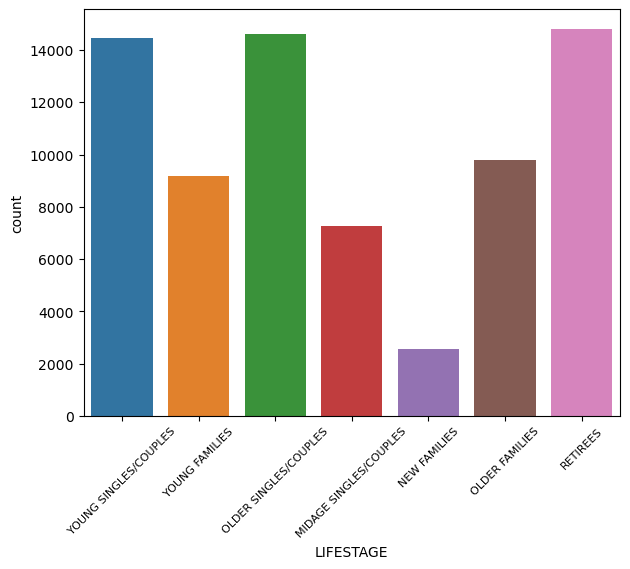

In [12]:
sns.countplot(x="LIFESTAGE", data=purchase)
plt.tight_layout()
plt.xticks(fontsize=8, rotation=45)
plt.show()

**Retirees** are the biggest buyers, so the bulk of the marketing campaign should be focused on them

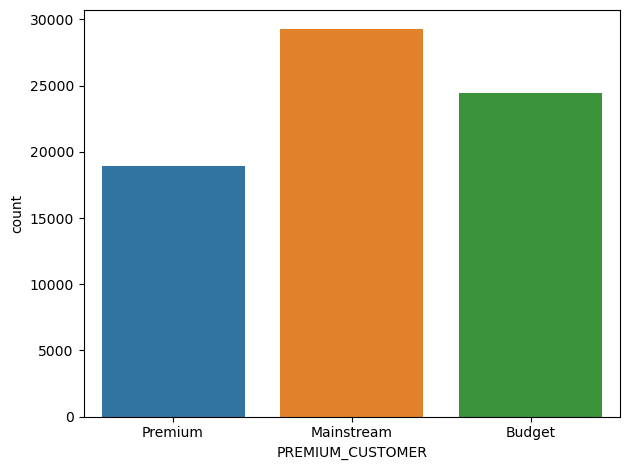

In [13]:
count_PREMIUM = pd.DataFrame(purchase.PREMIUM_CUSTOMER.value_counts()).reset_index()
sns.countplot(x="PREMIUM_CUSTOMER", data=purchase)
plt.tight_layout()
plt.show()

the most customer are **Mainstream**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'YOUNG SINGLES/COUPLES'),
  Text(1, 0, 'YOUNG FAMILIES'),
  Text(2, 0, 'OLDER SINGLES/COUPLES'),
  Text(3, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(4, 0, 'NEW FAMILIES'),
  Text(5, 0, 'OLDER FAMILIES'),
  Text(6, 0, 'RETIREES')])

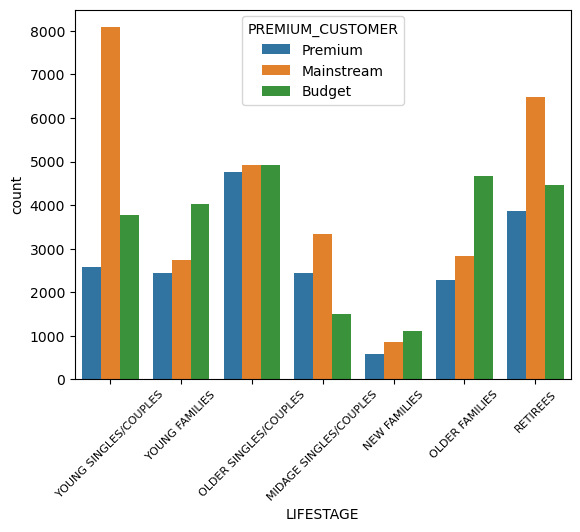

In [14]:
sns.countplot(x="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=purchase)
plt.xticks(fontsize=8, rotation=45)

**Older single/couples** are the most likely to be premium customers 

# **analyse the purchase transactions data**

In [15]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [16]:
transaction.shape

(246742, 8)

In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            246742 non-null  int64  
 1   STORE_NBR       246742 non-null  int64  
 2   LYLTY_CARD_NBR  246742 non-null  int64  
 3   TXN_ID          246742 non-null  int64  
 4   PROD_NBR        246742 non-null  int64  
 5   PROD_NAME       246742 non-null  object 
 6   PROD_QTY        246742 non-null  int64  
 7   TOT_SALES       246742 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.9+ MB


In [18]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [20]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')

In [23]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [21]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [22]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [55]:
data = pd.merge(purchase, transaction, on="LYLTY_CARD_NBR")
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [76]:
data_group = pd.DataFrame(data["DATE"].value_counts().reset_index())

C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'sales over the dates')

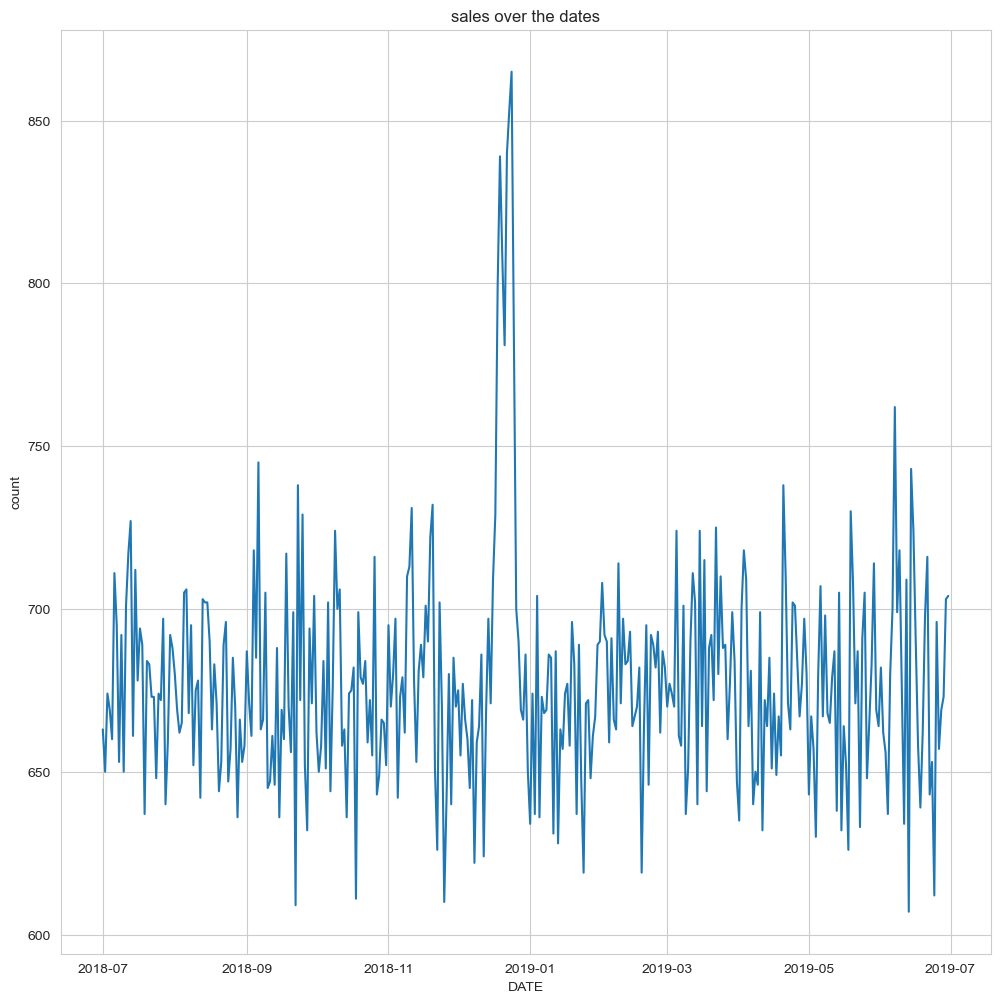

In [77]:
plt.figure(figsize=(12, 12))
sns.set_style('whitegrid')
sns.lineplot(x="DATE", y="count", data=data_group)
plt.title("sales over the dates")

In [78]:
data_group = data_group[data_group["DATE"].dt.month == 12]

Text(0.5, 1.0, 'sales over the dates')

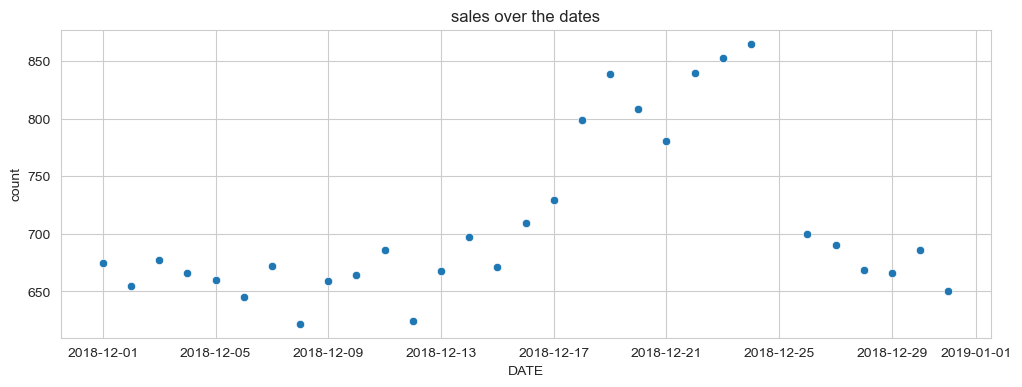

In [79]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.scatterplot(x="DATE", y="count", data=data_group)
plt.title("sales over the dates")

<Axes: xlabel='PACK_SIZE', ylabel='count'>

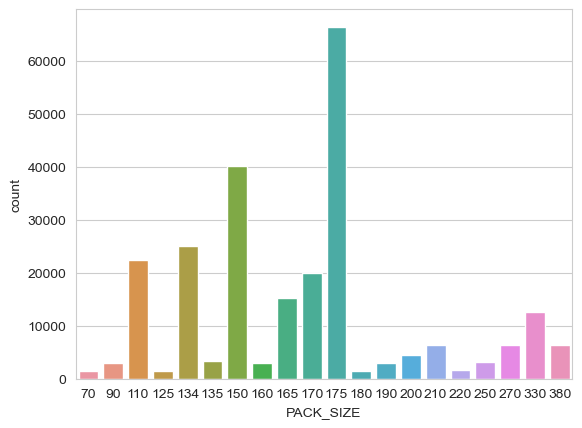

In [86]:
data['PACK_SIZE'] = data['PROD_NAME'].str.extract(r'(\d+)', expand=False).astype(int)
pack_size = data["PACK_SIZE"].value_counts().reset_index()
sns.countplot(data=data, x="PACK_SIZE")

### Analysis of the distribution of numerical variables

In [91]:
data[data.PROD_QTY == 200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
206519,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
206520,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [93]:
data[data.LYLTY_CARD_NBR == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
206519,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
206520,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [98]:
data.drop(data[data["LYLTY_CARD_NBR"] == 226000].index, inplace=True)
data[data.LYLTY_CARD_NBR == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

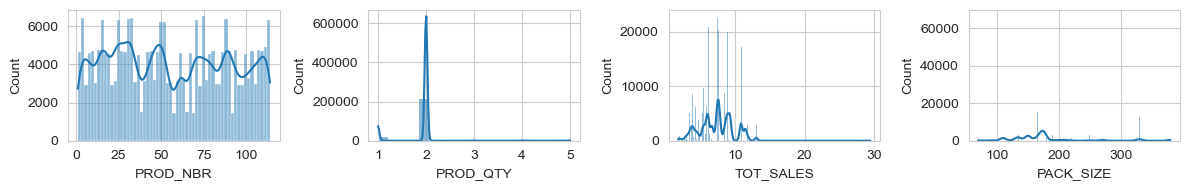

In [105]:
features = ["PROD_NBR", "PROD_QTY", "TOT_SALES", "PACK_SIZE"]

plt.figure(figsize=(12, 2))
for i, feature in enumerate(features):
    plt.subplot(1,4,i+1)
    sns.histplot(x=feature, kde=True, data=data)
plt.tight_layout()
plt.show()

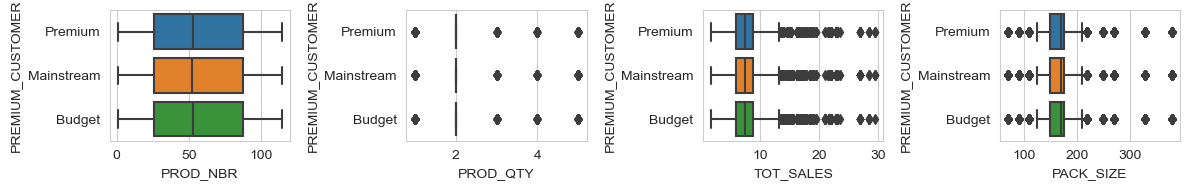

In [107]:
plt.figure(figsize=(12, 2))
for i, feature in enumerate(features):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=feature, y="PREMIUM_CUSTOMER", data=data)

plt.tight_layout()
plt.show()

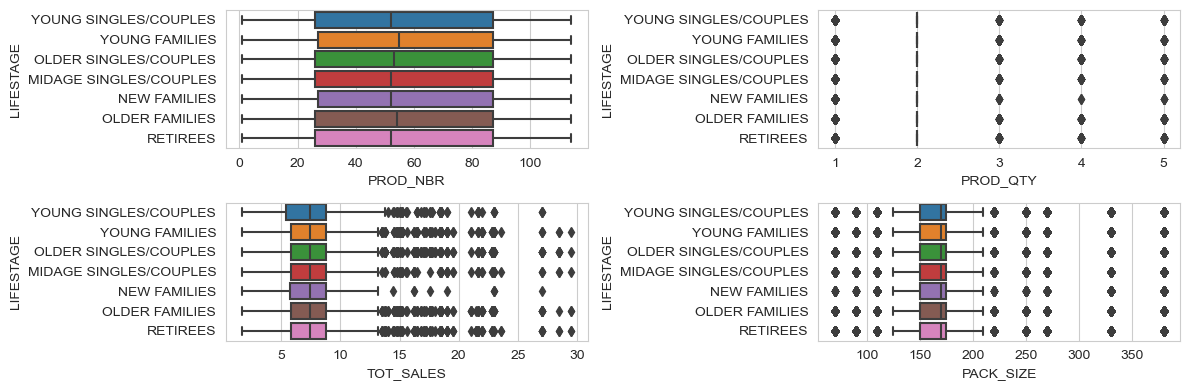

In [111]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=feature, y="LIFESTAGE", data=data)

plt.tight_layout()
plt.show()

C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x200 with 0 Axes>

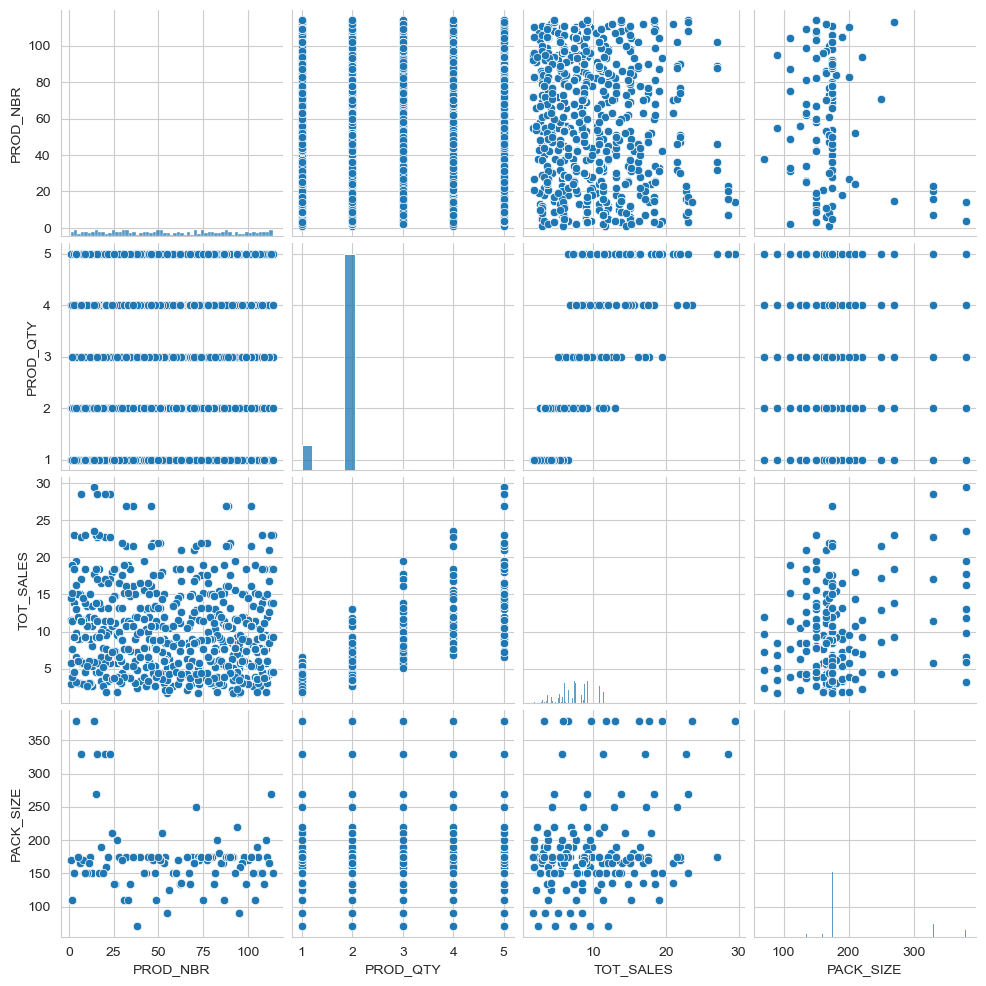

In [104]:
plt.figure(figsize=(12, 2))
sns.pairplot(data=data[["PROD_NBR", "PROD_QTY", "TOT_SALES", "PACK_SIZE"]])

In [ ]:
data.to_csv('transactionPurchase.csv')